In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import tree

In [3]:

fn = "../data/northeast_realestate.parquet"

# reading data into pandas dataframe
df = pd.read_parquet(fn)
print(df.columns)
df

Index(['price', 'bed', 'bath', 'acre_lot', 'street', 'city', 'state',
       'zip_code', 'house_size', 'sold_date'],
      dtype='object')


,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,sold_date
0,225000.0,3.0,1.0,3.93,326 River Rd,Willington,Connecticut,6279.0,1572.0,None
1,579900.0,4.0,3.0,2.34,32 Heather Ln,Coventry,Connecticut,6238.0,3320.0,6/1/2021
2,65000.0,1.0,1.0,NaN,63 Schofield Rd Apt 34,Willington,Connecticut,6279.0,680.0,8/16/2019
3,215000.0,2.0,1.0,0.91,353 Rye St,East Windsor,Connecticut,6016.0,960.0,6/6/2012
4,144900.0,2.0,1.0,0.36,24 Worcester Rd,Vernon,Connecticut,6066.0,860.0,9/2/2016
...,...,...,...,...,...,...,...,...,...,...
517500,445000.0,1.0,2.0,0.99,1008 King St,Chappaqua,New York,10514.0,1052.0,5/9/2011
517501,418000.0,4.0,2.0,0.40,3 Elmwood Dr,Monroe,New York,10950.0,1650.0,7/21/2015
517502,469000.0,4.0,2.0,0.18,13 N Conger Ave,Congers,New York,10920.0,2123.0,None
517503,825000.0,5.0,5.0,0.79,7 Miller Rd,Valley Cottage,New York,10989.0,3775.0,6/2/2010


In [5]:
towns = df.groupby(['city','state'],as_index=False).count().sort_values('price',ascending=False)
towns.head(20)

,city,state,price,bed,bath,acre_lot,street,zip_code,house_size,sold_date
937,New York City,New York,48801,42523,48199,11959,47517,48801,30773,24690
936,New York,New York,47362,40976,47061,556,47360,47360,27377,26021
138,Boston,Massachusetts,31502,29926,30927,14160,31502,31502,31062,12510
177,Brooklyn,New York,22698,20213,22079,9920,22671,22698,17117,12721
170,Bronx,New York,11586,10910,11136,5220,11574,11586,9735,7751
1320,Staten Island,New York,8032,7501,7720,7756,8011,8032,7551,5543
784,Manhattan,New York,6532,5814,6531,4,6532,6532,3564,3501
466,Flushing,New York,4673,4372,4632,2362,4623,4673,2461,3261
666,Jamaica,New York,3851,3717,3816,3252,3851,3851,1504,3032
1595,Worcester,Massachusetts,3715,3386,3386,3294,3715,3715,3386,1944


In [6]:
df['city,state']=df['city']+'_'+df['state']
df

,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,sold_date,"city,state"
0,225000.0,3.0,1.0,3.93,326 River Rd,Willington,Connecticut,6279.0,1572.0,None,Willington_Connecticut
1,579900.0,4.0,3.0,2.34,32 Heather Ln,Coventry,Connecticut,6238.0,3320.0,6/1/2021,Coventry_Connecticut
2,65000.0,1.0,1.0,NaN,63 Schofield Rd Apt 34,Willington,Connecticut,6279.0,680.0,8/16/2019,Willington_Connecticut
3,215000.0,2.0,1.0,0.91,353 Rye St,East Windsor,Connecticut,6016.0,960.0,6/6/2012,East Windsor_Connecticut
4,144900.0,2.0,1.0,0.36,24 Worcester Rd,Vernon,Connecticut,6066.0,860.0,9/2/2016,Vernon_Connecticut
...,...,...,...,...,...,...,...,...,...,...,...
517500,445000.0,1.0,2.0,0.99,1008 King St,Chappaqua,New York,10514.0,1052.0,5/9/2011,Chappaqua_New York
517501,418000.0,4.0,2.0,0.40,3 Elmwood Dr,Monroe,New York,10950.0,1650.0,7/21/2015,Monroe_New York
517502,469000.0,4.0,2.0,0.18,13 N Conger Ave,Congers,New York,10920.0,2123.0,None,Congers_New York
517503,825000.0,5.0,5.0,0.79,7 Miller Rd,Valley Cottage,New York,10989.0,3775.0,6/2/2010,Valley Cottage_New York


In [11]:
top_towns = ['Staten Island_New York','Worcester_Massachusetts','Boston_Massachusetts','Manhattan_New York','Portland_Maine']
df_top = df[df['city,state'].isin(top_towns)]
df_top = df_top[['price','bed','bath','house_size','city,state']].dropna()
df_top

,price,bed,bath,house_size,"city,state"
95335,319000.0,3.0,1.0,992.0,Portland_Maine
95387,314900.0,4.0,2.0,2272.0,Portland_Maine
95399,409000.0,3.0,2.0,1351.0,Portland_Maine
95404,424900.0,3.0,2.0,1656.0,Portland_Maine
95406,500000.0,3.0,2.0,1535.0,Portland_Maine
...,...,...,...,...,...
512398,290000.0,1.0,1.0,847.0,Staten Island_New York
512402,899000.0,2.0,2.0,1152.0,Manhattan_New York
512415,975000.0,1.0,1.0,638.0,Manhattan_New York
512416,3295000.0,5.0,6.0,3395.0,Manhattan_New York


In [17]:
model = DecisionTreeClassifier(random_state=7,max_depth=3)
_,classes = pd.factorize(df_top['city,state'])
print(classes)
features = ['price','bed','bath','house_size']
X = df_top[features]
y = df_top[['city,state']]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                            train_size=0.8,
                                            random_state=66) 
model.fit(X_train,y_train)
print(model.classes_)

Index(['Portland_Maine', 'Worcester_Massachusetts', 'Boston_Massachusetts',
       'Manhattan_New York', 'Staten Island_New York'],
      dtype='object')
['Boston_Massachusetts' 'Manhattan_New York' 'Portland_Maine'
 'Staten Island_New York' 'Worcester_Massachusetts']


In [15]:
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_0 <= 552500.00
|   |--- feature_3 <= 1167.50
|   |   |--- feature_0 <= 349999.50
|   |   |   |--- class: Worcester_Massachusetts
|   |   |--- feature_0 >  349999.50
|   |   |   |--- class: Boston_Massachusetts
|   |--- feature_3 >  1167.50
|   |   |--- feature_3 <= 1685.00
|   |   |   |--- class: Worcester_Massachusetts
|   |   |--- feature_3 >  1685.00
|   |   |   |--- class: Worcester_Massachusetts
|--- feature_0 >  552500.00
|   |--- feature_1 <= 2.50
|   |   |--- feature_0 <= 1149950.00
|   |   |   |--- class: Boston_Massachusetts
|   |   |--- feature_0 >  1149950.00
|   |   |   |--- class: Boston_Massachusetts
|   |--- feature_1 >  2.50
|   |   |--- feature_0 <= 1289500.00
|   |   |   |--- class: Boston_Massachusetts
|   |   |--- feature_0 >  1289500.00
|   |   |   |--- class: Boston_Massachusetts



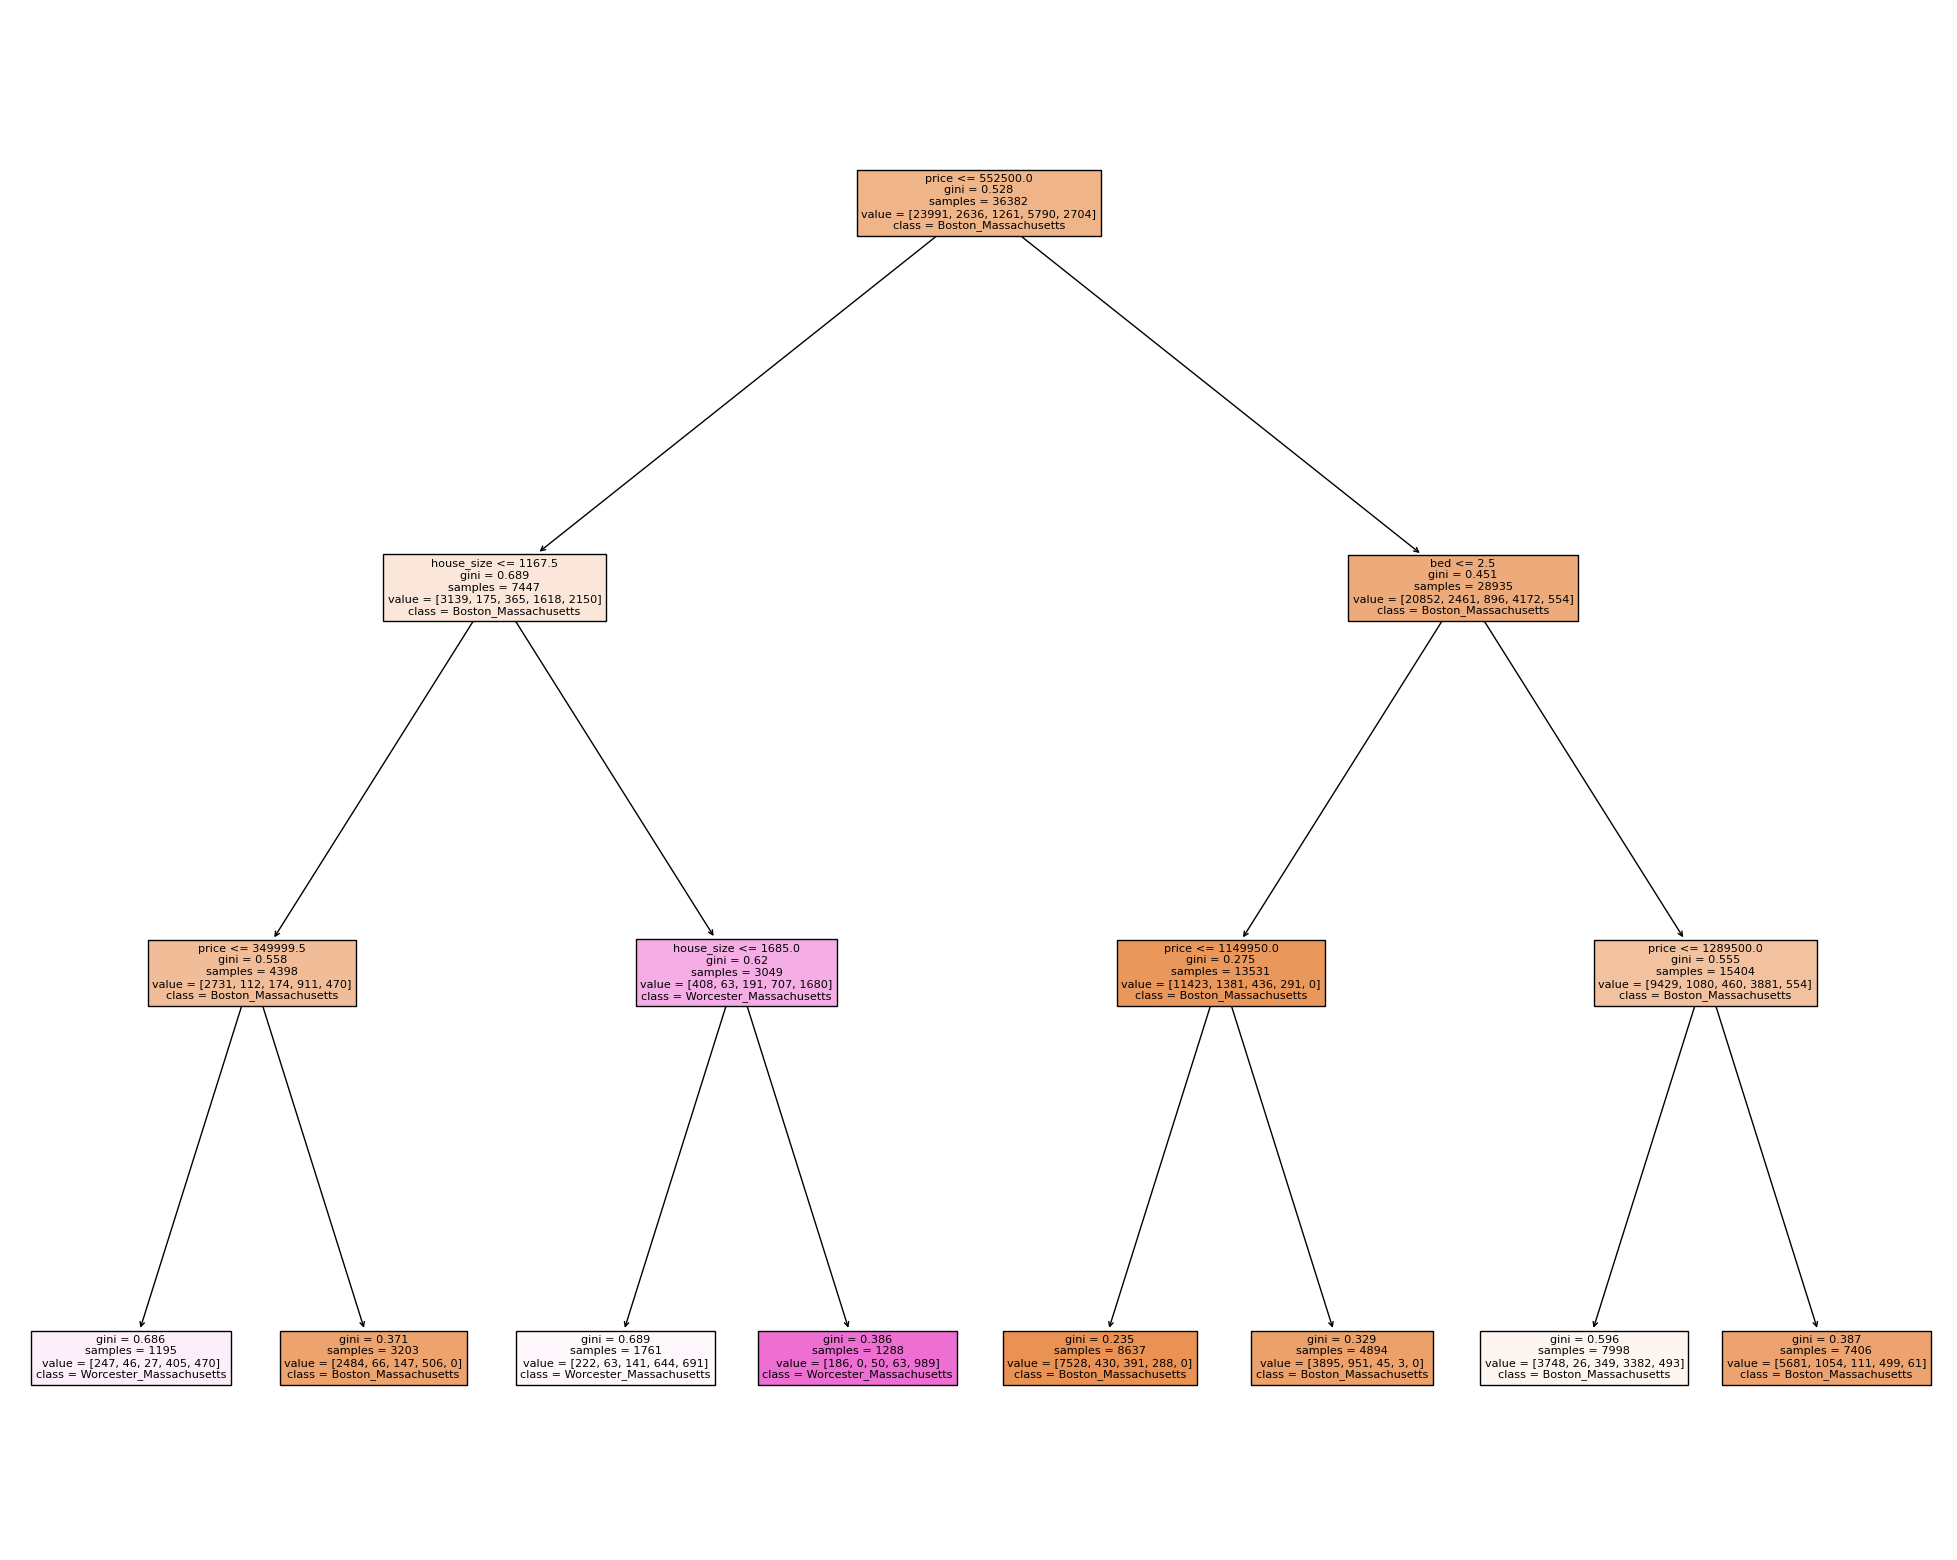

In [20]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, 
                   feature_names=['price','bed','bath','house_size'],  
                   class_names=model.classes_,
                   filled=True)

In [21]:
from sklearn import metrics
y_pred = model.predict(X_train)
metrics.accuracy_score(y_train,y_pred)

0.7005112418228795

In [24]:
y_pred_test = model.predict(X_test)
metrics.accuracy_score(y_test,y_pred_test)

0.6949208443271768

In [22]:
metrics.balanced_accuracy_score(y_train,y_pred)

0.35356328766285383

In [26]:
depth = 1
while depth <50:
    lg_model = DecisionTreeClassifier(random_state=7,max_depth=depth)
    lg_model.fit(X_train,y_train)
    y_pred = lg_model.predict(X_train)
    y_pred_test = lg_model.predict(X_test)
    txt = ' '
    if metrics.accuracy_score(y_train, y_pred)<metrics.accuracy_score(y_test, y_pred_test):
        txt = '!' 
    print(depth,metrics.accuracy_score(y_train, y_pred),metrics.accuracy_score(y_test, y_pred_test),lg_model.tree_.node_count,txt)
    depth+=1

1 0.6594194931559563 0.6524846086191732 3  
2 0.694381837172228 0.6895338610378188 7  
3 0.7005112418228795 0.6949208443271768 15  
4 0.7212082898136442 0.716358839050132 31  
5 0.7562256060689352 0.752858399296394 63  
6 0.7809905997471277 0.7795734388742305 123  
7 0.8060579407399263 0.8046394019349165 221  
8 0.8339838381617283 0.8295954265611257 353  
9 0.8663075147050739 0.8642260334212841 533  
10 0.8918421197295365 0.8865435356200527 751  
11 0.9233686988071024 0.9204045734388743 983  
12 0.9405475235006322 0.9376649076517151 1207  
13 0.9565994172942663 0.9543755496921724 1389  
14 0.9702050464515419 0.9686675461741425 1539  
15 0.9791930075311968 0.9775725593667546 1659  
16 0.9873014127865428 0.9841688654353562 1747  
17 0.9898026496619208 0.9880167106420404 1797  
18 0.9945852344565994 0.9921943711521548 1837  
19 0.9969765268539388 0.9946130167106421 1865  
20 0.9993403331317685 0.9973614775725593 1887  
21 0.9996976526853939 0.9975813544415127 1891  
22 0.9996976526853939 

In [27]:
print(X.iloc[0:2])
print(y.iloc[0:2])

          price  bed  bath  house_size
95335  319000.0  3.0   1.0       992.0
95387  314900.0  4.0   2.0      2272.0
           city,state
95335  Portland_Maine
95387  Portland_Maine


In [28]:
lg_model.predict(X.iloc[0:2])

array(['Portland_Maine', 'Portland_Maine'], dtype=object)

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(max_depth=8, random_state=33,oob_score = True)
rf_model.fit(X_train, y_train)

C:\Users\Tycon\AppData\Local\Temp\ipykernel_20584\1549671795.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=8, oob_score=True, random_state=33)

In [31]:
y_pred = rf_model.predict(X_train)
metrics.accuracy_score(y_train, y_pred)

0.8505304821065361

In [ ]:
y_pred_test = rf_model.predict(X_test)
metrics.accuracy_score(y_test, y_pred_test)